## Problem Metadata 
DO NOT DELETE. This is a JSON Block. The metadata and course context MUST be in the first cell. 

```json
{
    "problem_title": "coefficientOfPerformanceHeatPump",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Refrigeration",
    "lecture_reference": {
        "lecture_id": "",
        "subtopics": [
            {
                "key": "",
                "topic": ""
            },
            {
                "key": "",
                "topic": ""
            }
        ]
    },
    "book_reference": {
        "chapter_number": 11,
        "title": "Refrigeration Cycles",
        "sections": [
            "Refrigerators and Heat Pumps"
        ]
    },
    "notes": ""
}

## 1. Problem Statement

You are given a system that can operate on either as a refrigeration system or a heat pump system.

**Goal:** 
- Determine coefficient of performance of both systems.
- Determine the coefficient of performance of both systems assuming that they operate reversibly between two thermal reservoirs (Carnot). 

## 2. Schematic 
```
+--------------+
|              ^
|              |
|             (4)
|              |
|    +-------------------+
|    |                   |
|    |  Expansion Valve  |
|    |                   |
|    +-------------------+
|              ^
|              |
|             (3)
|              |
|    +-------------------+
|    |                   |
|    |     Condenser     |-----> Heat out (Q_H)
|    |                   |
|    +-------------------+
|              ^
|              |
|             (2)
|              |
|    +-------------------+
|    |                   |
|    |     Compressor    |<----- Work in (W_in)
|    |                   |
|    +-------------------+
|              ^
|              |
|             (1)
|              |
|    +-------------------+
|    |                   |
|    |     Evaporator    |<----- Heat Absorbed (Q_L)
|    |                   |
|    +-------------------+
|              ^
|              |
|             (4)
|              | 
+ -------------+ 
```

## 3. Assumptions and Approximations
### A. General (Cycle-Wide) Assumptions
1.  **Steady-State/Steady-Flow:** For each device in the cycle ($\Delta m_\text{CV}= 0$, $\Delta E_\text{CV}= 0$, $\Delta S_\text{CV}= 0$).
2.  **Overall Energy:** All changes in **Kinetic Energy ($\Delta KE$) and Potential Energy ($\Delta PE$)** are negligible between components, except where explicitly calculated (e.g., for a nozzle or diffuser).
3.  ***Property Model and Analysis Method:*** 
    * **Property tables: `pyCalor` (Accurate):**
        * **Purpose:** Must be used for determining water properties. 
        * **Tools:** Properties ($h$, $s$, $T$, and $p$) are retrieved directly from a **thermodynamic property library** (e.g., **`pyCalor`**). Since it is a pure substance we only need to know two independent properties.

---

### B. Component-Specific Assumptions

1.  **Conservation of Mass:** For all devices operating at steady-flow, the mass entering is equal to the mass exiting: **$\dot{m}_{\text{in}} = \dot{m}_{\text{out}}$**).
2.  **Conservation of Energy (First Law):** The **Steady-Flow Energy Equation** is applied to determine work and heat transfer.
3.  **Entropy Balance (Second Law):** The **Entropy Balance for a Control Volume Equation** is applied to determine changes in entropy.

#### 1-2. Compressor
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_C$)**.

#### 2-3. Condenser
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.
* **Saturated Liquid** at the exit state.

#### 3-4. Expansion Valve
* **Adiabatic:** $\dot{Q}=0$.
* * **No Shaft Work:** $\dot{W}=0$.

#### 4-1. Evaporator
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

## 4. Physical Laws
### Control Volumes:
1.  **First Law of Thermodynamics (Energy Balance for Control Volume):**
    $$\frac{dE_\text{CV}}{dt} = \dot{E}_\text{in} - \dot{E}_\text{out}$$

2.  **Conservation of Mass (Mass Balance for a Control Volume):**
    $$\frac{dm_\text{CV}}{dt} = \dot{m}_\text{in} - \dot{m}_\text{out}$$
    
3.  **Entropy Balance (Second Law for a Control Volume):**
    $$\frac{dS_\text{CV}}{dt} = \dot{S}_\text{in} - \dot{S}_\text{out} + \dot{S}_\text{gen}$$

### Steady-Flow Analysis
Since each devices operates as a **Steady-Flow** device we can write: 

**Mass Balance:**
$$\dot{m}_\text{in} = \dot{m}_\text{out} = \dot{m}$$

**Energy Balance:**
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} + \frac{w_\text{in}^2}{2} + g z_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} + \frac{w_\text{out}^2}{2} + g z_\text{out} \right)$$

Neglecting kinetic and potential energy effects:
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} \right)$$

**Entropy Balance:**
$$\dot{S}_\text{gen} = \dot{S}_\text{out} - \dot{S}_\text{in}$$

Assuming that the process is adiabatic and reversible (isentropic), we have:
$$\dot{S}_\text{out} = \dot{S}_\text{in}$$

and

$$\dot{m}_\text{out}s_\text{out} = \dot{m}_\text{in}s_\text{in}$$

Therefore,

$$s_\text{in} = s_\text{out}$$

### Device Governing Equations (First Law)
We can write our steady-flow energy equation for each device by applying the appropriate **Assumptions and Approximations** listed above.

For the compressor (1-2):
$$\dot{W}_\text{in} =  \dot{m} \left(h_\text{2a} - h_1\right)$$

For the Condenser (2-3):
$$\dot{Q}_\text{out} = \dot{m} \left(h_\text{2a} - h_3\right)$$

For the expansion valve (3-4):
$$h_4 = h_3$$

For the condenser (4-1):
$$\dot{Q}_\text{in} = \dot{m} \left(h_1 - h_4\right)$$

### Isentropic Efficiency (Linking Actual and Ideal States)

The isentropic efficiency definition for a compressor is used to determine the actual exit enthalpy ($h_{2a}$):

**Compressor Isentropic Efficiency:**
$$\eta_\text{C} = \frac{\text{Isentropic compressor work}}{\text{Actual compressor work}} = \frac{h_{2s} - h_1}{h_{2a} - h_1} $$

### Coefficient of Performance of a Refrigeration System

What we want is to cool a refrigerated space. The rate of cooling is $\dot{Q}_\text{in}$. What we need to input in order to achieve this is work, $\dot{W}_\text{in}$. Therefore:

$$\text{COP}_\text{R} = \frac{\dot{Q}_\text{in}}{\dot{W}_\text{in}} = \frac{h_1 - h_4}{h_\text{2a} - h_1} $$

COP values are greater than 1. How is it possible that we can transfer more heat out of an evaporated space than the work we put in? To answer this question we can draw a control volume around the entire system, we can see that:

$$\dot{Q}_\text{out} = \dot{Q}_\text{in} + \dot{W}_\text{in} $$

So the heat that we transfer out is equal to the heat that we remove from the refrigerated space plus the work transferred into the compressor. 

### Coefficient of Performance of a Heat Pump System

What we want is to heat a warm space by cooling the cold outside air. The rate of heating is $\dot{Q}_\text{out}$. What we need to input in order to achieve this is work, $\dot{W}_\text{in}$. Therefore:

$$\text{COP}_\text{HP} = \frac{\dot{Q}_\text{out}}{\dot{W}_\text{in}} = \frac{h_\text{2a} - h_3}{h_\text{2a} - h_1} $$

### Coefficient of Performance of a Carnot Refrigeration and Heat Pump System

For this analysis we assume that heat is transferred to and from thermal reservoirs at their respective temperatures. 

The definition of the COP for a refrigeration cycle is:

$$\text{COP}_\text{R} = \frac{Q_\text{L}}{Q_\text{H} - Q_\text{L}} = \frac{1}{\frac{Q_\text{H}}{Q_\text{L}}-1}$$

For a cycle we can write:

$$\oint \frac{\delta Q}{T} \le 0$$

If the cycle is reversible:

$$\oint \frac{\delta Q}{T} = 0$$

For our process we can write this as:

$$\frac{Q_\text{L}}{T_\text{L}} - \frac{Q_\text{H}}{T_\text{H}} = 0$$

where $Q_\text{L}$ is the heat transferred from a thermal reservoir at temperature $T_\text{L}$ and where $Q_\text{H}$ is the heat transferred to a thermal reservoir at temperature $T_\text{H}$. Rearraning we can write:

$$\frac{T_\text{H}}{T_\text{L}} = \frac{Q_\text{H}}{Q_\text{L}}$$

Substituting into our equation for the COP:

$$\text{COP}_\text{R} = \frac{Q_\text{L}}{Q_\text{H} - Q_\text{L}} = \frac{1}{\frac{T_\text{H}}{T_\text{L}}-1}$$

The definition of the COP for a heat pump cycle is:

$$\text{COP}_\text{HP} = \frac{Q_\text{H}}{Q_\text{H} - Q_\text{L}} = \frac{1}{1 - \frac{Q_\text{L}}{Q_\text{H}}}$$

If the cycle is reversible we can then write:

$$\text{COP}_\text{HP} = \frac{Q_\text{H}}{Q_\text{H} - Q_\text{L}} = \frac{1}{1 - \frac{T_\text{L}}{T_\text{H}}}$$

In [8]:
# 5. Properties (Code Cell)
import matplotlib.pyplot as plt
import numpy as np

# Let's analyze the COP for a Carnot heat pump
TH_C = 20
TH_K = TH_C + 273.15

# The minimum temperature of the low temperature thermal reservoir
TL_C = -30

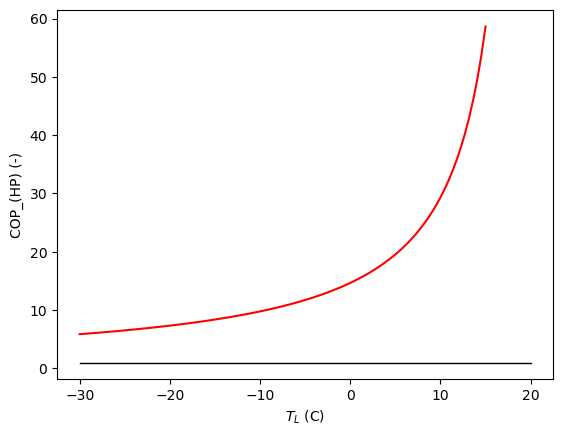

In [13]:
# 6 Calculations (Code Cell)
plt.figure()
plt.clf()
TL = np.linspace(TL_C+273.15, TH_K -5, 100) # range of temperatures
TL_C_ = TL - 273.15
TH = np.linspace(TH_K, TH_K, 100) # range of temperatures

COP = 1/(1 - (TL/TH))

#plt.loglog(TL, COP, 'r-') 
#plt.loglog([TL_C+273.15, TH_K], [1, 1], 'k-', lw=1) # Path 1 to 2

#plt.loglog(TL_C, COP, 'r-') 
plt.plot(TL_C_, COP, 'r-') 
plt.plot([TL_C,TH_K-273.15],[1, 1], 'k-', lw=1)

plt.xlabel('$T_L$ (C)')
plt.ylabel('COP_(HP) (-)')
plt.savefig('cop.pdf')

## 7. Summary and Reasoning

We have defined the coefficients of performance for an ideal-vapor compression cycle. One was for refrigeration and the other was for heating. Note that this is not an internally reversible process since it involves throttling. We could make this process internally reversible if we replaced the expansion valve with a turbine. 

* **Key Insight:** We can transfer more heat than the work that we put in, resulting in $\text{COP} > 1$, which is not a violation of the first law even though it seems to. This is important for cooling but especially important for electrifying heating systems.

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---